In [2]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 23.8 MB/s eta 0:00:00


In [3]:
from pathlib import Path

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
import dmba
from dmba import regressionSummary

%matplotlib inline

Colab environment detected.


In [5]:
airfares_df = dmba.load_data('Airfares.csv')
airfares_df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [6]:
airfares_df.dtypes

S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

The columns VACATION, SW, SLOT, and GATE are not numeric. Convert them to numeric.

In [7]:
airfares_df['VACATION'] = [1 if v == 'Yes' else 0 for v in airfares_df['VACATION']]
airfares_df['SW'] = [1 if v == 'Yes' else 0 for v in airfares_df['SW']]
airfares_df['SLOT'] = [1 if v == 'Controlled' else 0 for v in airfares_df['SLOT']]
airfares_df['GATE'] = [1 if v == 'Constrained' else 0 for v in airfares_df['GATE']]
airfares_df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,0,1,5291.99,28637.0,21112.0,3036732,205711,0,0,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,0,0,5419.16,26993.0,29838.0,3532657,7145897,0,0,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,0,0,9185.28,30124.0,29838.0,5787293,7145897,0,0,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,1,2657.35,29260.0,29838.0,7830332,7145897,1,0,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,0,1,2657.35,29260.0,29838.0,7830332,7145897,0,0,612,25144,85.47


Partition the data into training (60%) and testing sets

In [8]:
airfares_df.columns
outcome = 'FARE'
predictors = ['COUPON', 'NEW', 'VACATION','SW', 'HI', 'S_INCOME', 'E_INCOME',
              'S_POP', 'E_POP', 'SLOT', 'GATE', 'DISTANCE', 'PAX']

X = airfares_df[predictors]
y = airfares_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print('Training set:', train_X.shape, 'Validation set:', valid_X.shape)

Training set: (382, 13) Validation set: (256, 13)


Create a correlation table and pairs plot.

In [10]:
train_df = pd.concat([train_X, train_y], axis=1)
train_df.corr()

,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
COUPON,1.000000,0.025132,0.024180,-0.158117,-0.354389,-0.090433,0.037331,-0.102279,0.099588,-0.038428,-0.018363,0.743019,-0.332880,0.502335
NEW,0.025132,1.000000,-0.049883,-0.112977,0.010774,0.026476,0.157046,-0.009813,0.133315,0.117870,0.018229,0.090428,0.017394,0.119516
VACATION,0.024180,-0.049883,1.000000,0.015654,-0.142726,-0.236000,-0.078587,-0.222516,-0.142495,-0.076700,-0.137747,0.095136,0.002434,-0.266358
SW,-0.158117,-0.112977,0.015654,1.000000,-0.062153,-0.236750,-0.271006,-0.047045,-0.272018,-0.233637,-0.250273,-0.195019,-0.078357,-0.515427
HI,-0.354389,0.010774,-0.142726,-0.062153,1.000000,-0.030570,0.111794,-0.204465,-0.061016,-0.174160,0.094165,-0.352959,-0.178194,-0.026594
S_INCOME,-0.090433,0.026476,-0.236000,-0.236750,-0.030570,1.000000,-0.169207,0.480598,-0.237119,0.192671,0.126280,0.013733,0.115963,0.179895
E_INCOME,0.037331,0.157046,-0.078587,-0.271006,0.111794,-0.169207,1.000000,-0.179291,0.450831,0.174351,0.060130,0.168844,0.254180,0.314282
S_POP,-0.102279,-0.009813,-0.222516,-0.047045,-0.204465,0.480598,-0.179291,1.000000,-0.269987,0.252964,0.126069,0.018494,0.275783,0.140067
E_POP,0.099588,0.133315,-0.142495,-0.272018,-0.061016,-0.237119,0.450831,-0.269987,1.000000,0.276148,0.153575,0.144618,0.355537,0.314746
SLOT,-0.038428,0.117870,-0.076700,-0.233637,-0.174160,0.192671,0.174351,0.252964,0.276148,1.000000,-0.142768,0.005450,0.275154,0.173811


Visualize the correlation matrix.

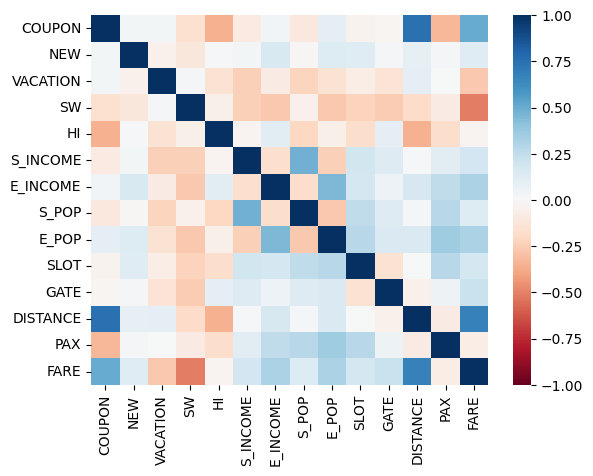

In [11]:
corr = train_df.corr()
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1,
            cmap="RdBu")

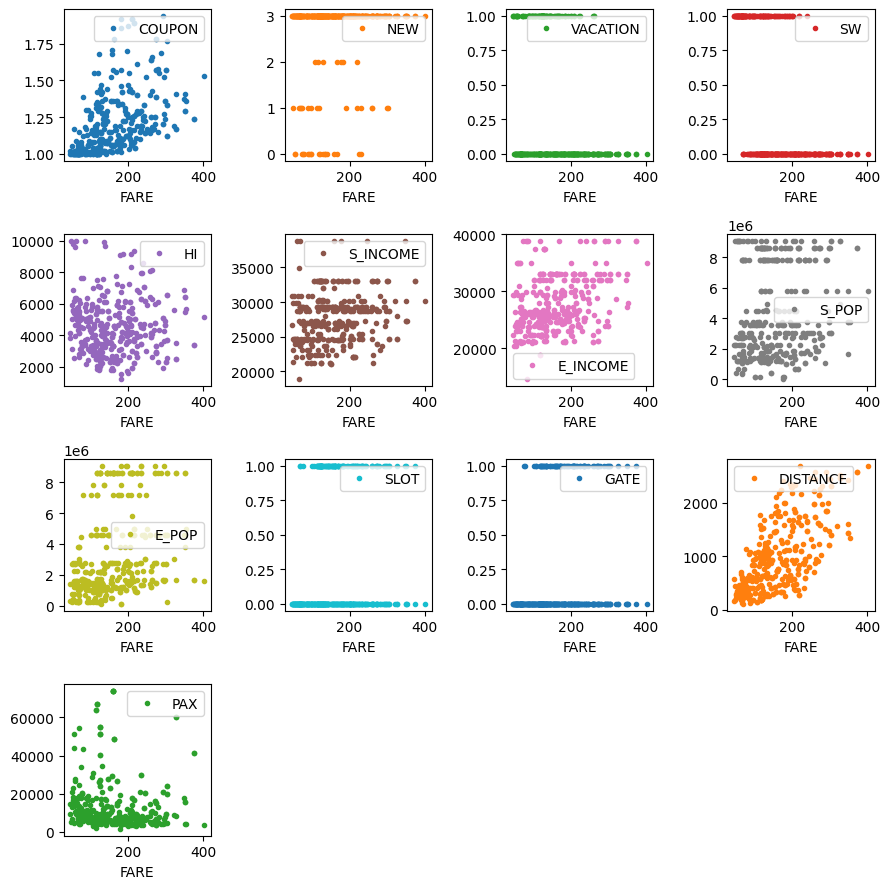

In [12]:
train_df.plot(x='FARE', subplots=True, layout=(-1, 4), figsize=(9, 9), sharex=False,
              ls='none', marker='.');
plt.tight_layout()

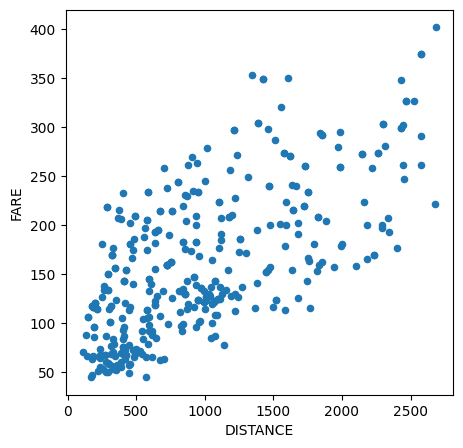

In [13]:
# Display the scatterplot of DISTANCE vs FARE
_ = train_df.plot.scatter(x='DISTANCE', y='FARE', figsize=(5, 5))

Find a linear regression model for predicting the average fare on a new route.

In [26]:
from sklearn.pipeline import make_pipeline

# Create a pipeline with StandardScaler and LinearRegression
airfares_lm = make_pipeline(StandardScaler(), LinearRegression())

airfares_lm.fit(train_X, train_y)

# Access the LinearRegression model within the pipeline
linear_reg_model = airfares_lm.named_steps['linearregression']

# print coefficients
print('Intercept:', linear_reg_model.intercept_)
print('Coefficients:', linear_reg_model.coef_)

# print performance measures
print('Training set')
regressionSummary(train_y, airfares_lm.predict(train_X))
print('Validation set')
regressionSummary(valid_y, airfares_lm.predict(valid_X))

Intercept: 160.96353403141362
Coefficients: [ -2.40873221  -1.89425571 -15.57520047 -19.52356544  11.9366906
   2.23200938   6.01562611  11.6231855   12.42828534   6.02387096
   8.45765622  50.1856007  -12.98929293]
Training set

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.7664
            Mean Absolute Error (MAE) : 27.1065
          Mean Percentage Error (MPE) : -4.5089
Mean Absolute Percentage Error (MAPE) : 20.0849
Validation set

Regression statistics

                      Mean Error (ME) : -1.8231
       Root Mean Squared Error (RMSE) : 36.0002
            Mean Absolute Error (MAE) : 28.5002
          Mean Percentage Error (MPE) : -6.6037
Mean Absolute Percentage Error (MAPE) : 21.6048


The performance statistics for the training and validation sets are comparable. This indicates that the model is stable and not overfitting.

The coefficients are for unscaled predictors; this makes them hard to interpret. Build the second model using standardized predictors.

In [29]:
scaler = StandardScaler()
scaler.fit(train_X * 1.0)

# airfares_lm_2 = LinearRegression(normalize=True)
airfares_lm_2 = make_pipeline(StandardScaler(), LinearRegression())

airfares_lm_2.fit(scaler.transform(train_X * 1.0), train_y)

# Access the LinearRegression model within the pipeline
linear_reg_model_2 = airfares_lm_2.named_steps['linearregression']

# print coefficients
print('Intercept:', linear_reg_model_2.intercept_)
print('Coefficients:', linear_reg_model_2.coef_)

# print performance measures
regressionSummary(train_y, airfares_lm_2.predict(scaler.transform(train_X * 1.0)))
regressionSummary(valid_y, airfares_lm_2.predict(scaler.transform(valid_X * 1.0)))

Intercept: 160.96353403141362
Coefficients: [ -2.40873221  -1.89425571 -15.57520047 -19.52356544  11.9366906
   2.23200938   6.01562611  11.6231855   12.42828534   6.02387096
   8.45765622  50.1856007  -12.98929293]

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 34.7664
            Mean Absolute Error (MAE) : 27.1065
          Mean Percentage Error (MPE) : -4.5089
Mean Absolute Percentage Error (MAPE) : 20.0849

Regression statistics

                      Mean Error (ME) : -1.8231
       Root Mean Squared Error (RMSE) : 36.0002
            Mean Absolute Error (MAE) : 28.5002
          Mean Percentage Error (MPE) : -6.6037
Mean Absolute Percentage Error (MAPE) : 21.6048


With the standardized predictors, the model coefficients are more explanatory. We can see that DISTANCE has the largest positive impact on FARE, followed by the population sizes (S_POP, E_POP) and the Herfindahl index (HI). The FARE price is negatively impacted if Soutwest (SW) services the route, if it is a vacation route (VACATION) and if the number of passengers on this route is high (PAX).

Using this model, compute the predicted fare for the following route: COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S_INCOME = $28,760, E_INCOME = $27,664, S_POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12782, DISTANCE = 1976 miles.

In [30]:
new_row_df = pd.DataFrame([
    {'COUPON': 1.202, 'NEW': 3, 'VACATION': 0, 'SW': 0, 'HI': 4442.141,
     'S_INCOME': 28760, 'E_INCOME': 27664, 'S_POP': 4557004, 'E_POP': 3195503,
     'SLOT': 0, 'GATE': 0, 'PAX': 12782, 'DISTANCE': 1976}], columns=train_X.columns)
airfares_lm.predict(new_row_df)

array([253.6962435])